<a href="https://colab.research.google.com/github/HelenLit/happy-sad-face_CNN/blob/main/happy_or_sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the compressed dataset dataset.zip:

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1oMTJscfxR_6NIicWzycaIeO-9ILrTvqb' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1oMTJscfxR_6NIicWzycaIeO-9ILrTvqb" -O dataset.zip && rm -rf /tmp/cookies.txt

--2023-08-21 19:30:52--  https://docs.google.com/uc?export=download&confirm=t&id=1oMTJscfxR_6NIicWzycaIeO-9ILrTvqb
Resolving docs.google.com (docs.google.com)... 74.125.197.138, 74.125.197.100, 74.125.197.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bp53inat89635uugfmu5qqloaqmp2s4o/1692646200000/07125694706359273300/*/1oMTJscfxR_6NIicWzycaIeO-9ILrTvqb?e=download&uuid=98ae12c3-abc3-4da7-9803-777e1cdff900 [following]
--2023-08-21 19:30:52--  https://doc-08-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bp53inat89635uugfmu5qqloaqmp2s4o/1692646200000/07125694706359273300/*/1oMTJscfxR_6NIicWzycaIeO-9ILrTvqb?e=download&uuid=98ae12c3-abc3-4da7-9803-777e1cdff900
Resolving doc-08-60-docs.googleusercontent.com (doc-08-60-docs.googleusercontent.com)... 108.177.98.132, 

In [3]:
import zipfile

# Unzip the dataset
local_zip = './dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./dataset')

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

#Load and explore the data

Sample happy image:


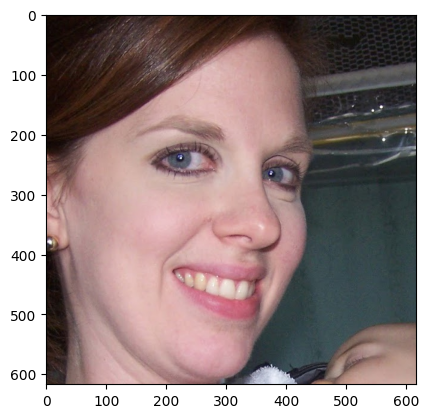


Sample sad image:


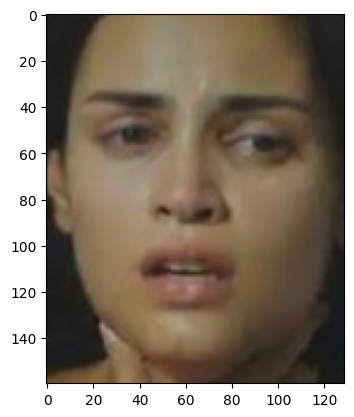

In [5]:
from tensorflow.keras.preprocessing.image import load_img

happy_dir =  os.path.join("./dataset/Happy")
sad_dir = os.path.join("./dataset/Sad")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[3])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[3])}"))
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[1000])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"First image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

First image has shape: (188, 129, 3)
The maximum pixel value used is: 255.0


#Defining the callback

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

#Pre-processing the data

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator():

    train_datagen = ImageDataGenerator(rescale=1/255)

    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory='./dataset/',
                                                        target_size=(350,350),
                                                        batch_size=10,
                                                        class_mode='binary')
    return train_generator

In [9]:
gen = image_generator()

#Found 38580 images belonging to 2 classes

Found 7674 images belonging to 2 classes.


#Creating and training model

In [10]:
from tensorflow.keras import optimizers, losses

# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model(train_generator):

    # Instantiate the callback
    callbacks = myCallback()

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(350,350,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])

    #View network architecture and the output shapes
    model.summary()

    # Train the model
    history = model.fit(x=gen,
                        epochs=10,
                        callbacks=callbacks
                       )

    return model

In [11]:
model = train_happy_sad_model(gen)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 86, 86, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 64)       0

#Model Prediction
 This code allows to choose 1 or more files from file system, upload them, and run them through the model, giving an indication of whether the object contains happy or sad emotion.

In [13]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(350, 350))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is happy")
  else:
    print(fn + " is sad")

Saving attractive-happy-guy-with-bristle-have-wide-smile.tif to attractive-happy-guy-with-bristle-have-wide-smile.tif
Saving OIP (1).png to OIP (1).png
Saving portrait-smiling-happy-young-man-isolated-white.png to portrait-smiling-happy-young-man-isolated-white.png
1/1 [==============================] - 0s 29ms/step
[0.99999845]
attractive-happy-guy-with-bristle-have-wide-smile.tif is happy
1/1 [==============================] - 0s 27ms/step
[2.0848438e-18]
OIP (1).png is sad
1/1 [==============================] - 0s 19ms/step
[1.]
portrait-smiling-happy-young-man-isolated-white.png is happy
